In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import cv2
image = cv2.imread('29.ppm')

In [3]:
image.shape

(605, 700, 3)

In [4]:
red = np.zeros(shape=(605,700))
green = np.zeros(shape=(605,700))
blue = np.zeros(shape=(605,700))
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        red[i][j] = image[i][j][0]
        green[i][j] = image[i][j][1]
        blue[i][j] = image[i][j][2]

In [5]:
import math
def bilinear_resize(image, height, width):
    
    img_height, img_width = image.shape[:2]

    resized = np.empty([height, width])

    x_ratio = float(img_width - 1) / (width - 1) if width > 1 else 0
    y_ratio = float(img_height - 1) / (height - 1) if height > 1 else 0


    for i in range(height):
        for j in range(width):
            
            x_l, y_l = math.floor(x_ratio * j), math.floor(y_ratio * i)
            x_h, y_h = math.ceil(x_ratio * j), math.ceil(y_ratio * i)

            x_weight = (x_ratio * j) - x_l
            y_weight = (y_ratio * i) - y_l

            a = image[y_l, x_l]
            b = image[y_l, x_h]
            c = image[y_h, x_l]
            d = image[y_h, x_h]

            pixel = a * (1 - x_weight) * (1 - y_weight) + b * x_weight * (1 - y_weight) + c * y_weight * (1 - x_weight) + d * x_weight * y_weight

            resized[i][j] = pixel

    return resized

In [6]:
width = math.floor(image.shape[1]*1.4)
height = math.floor(image.shape[0]*1.4)

In [7]:
scaled_red = bilinear_resize(red, height,width)
scaled_green = bilinear_resize(green, height, width)
scaled_blue = bilinear_resize(blue, height, width)

In [8]:
scaled_blue.shape

(847, 979)

In [9]:
scaled_image = np.zeros(shape=(847,979,3))

In [10]:
for i in range(scaled_red.shape[0]):
    for j in range(scaled_red.shape[1]):
        scaled_image[i][j][0] = scaled_red[i][j]
        scaled_image[i][j][1] = scaled_green[i][j]
        scaled_image[i][j][2] = scaled_blue[i][j]

In [11]:
cv2.imwrite('1.4 factor.png', scaled_image)

True

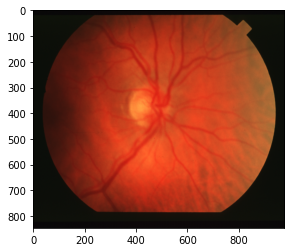

In [12]:
pil_image = Image.open('1.4 factor.png')
plt.imshow(pil_image)

In [13]:
width = math.floor(image.shape[1]*0.4)
height = math.floor(image.shape[0]*0.4)

In [14]:
scaled_red = bilinear_resize(red, height,width)
scaled_green = bilinear_resize(green, height, width)
scaled_blue = bilinear_resize(blue, height, width)

In [15]:
scaled_blue.shape

(242, 280)

In [16]:
scaled_image = np.zeros(shape=(242,280,3))

In [17]:
for i in range(scaled_red.shape[0]):
    for j in range(scaled_red.shape[1]):
        scaled_image[i][j][0] = scaled_red[i][j]
        scaled_image[i][j][1] = scaled_green[i][j]
        scaled_image[i][j][2] = scaled_blue[i][j]

In [18]:
cv2.imwrite('0.4 factor.png', scaled_image)

True

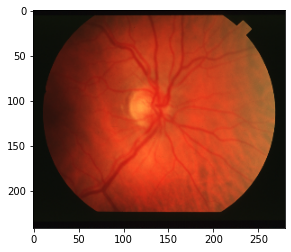

In [19]:
pil_image = Image.open('0.4 factor.png')
plt.imshow(pil_image)

In [20]:
# in the above picture scale is from 0 to 250